# Mutiple Linear Regression บน Boston Housing Dataset

<ul>
<li>ใช้ OLS จาก statsmodels</li>
<li>ใช้ Boston Housing Dataset จาก Sktlearn</li>
<li>สร้าง Regression โมเดลโดยทำการแบ่งข้อมูลออกเป็น Training set และ Test set โดยใช้ train_test_split() ใน sklearn</li>
<li>วัดประสิทธิภาพของโมเดลโดยใช้ค่า MSE</li>
</ul>

In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.regression.linear_model import OLS
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from pandas.core import datetools

In [6]:
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
boston.data.shape

(506, 13)

In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Convert raw data to Pandas Data Frame

In [11]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [12]:
bos['PRICE'] = boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Split train-test dataset
y = Boston Housing Price <br/>
X = All other features

In [16]:
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=0)

In [18]:
print("X train : ", X_train.shape)
print("X test  : ", X_test.shape)
print("y train : ",y_train.shape)
print("y test  : ", y_test.shape)

X train :  (339, 13)
X test  :  (167, 13)
y train :  (339,)
y test  :  (167,)


### สร้างโมเดล Regression

In [19]:
model = OLS(y_train, X_train)

In [20]:
results = model.fit()

In [21]:
results.params

CRIM      -0.114721
ZN         0.050795
INDUS     -0.030866
CHAS       2.794751
NOX        0.222205
RM         6.081799
AGE       -0.018796
DIS       -1.019565
RAD        0.093991
TAX       -0.007691
PTRATIO   -0.443328
B          0.012267
LSTAT     -0.383473
dtype: float64

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     641.1
Date:                Sat, 07 Apr 2018   Prob (F-statistic):          3.15e-223
Time:                        14:20:22   Log-Likelihood:                -1011.3
No. Observations:                 339   AIC:                             2049.
Df Residuals:                     326   BIC:                             2098.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1147      0.041     -2.829      0.0

### ใช้โมเดลที่ได้ทำนายข้อมูลในชุด X_test

In [23]:
y_pred = results.predict(X_test, transform=False)

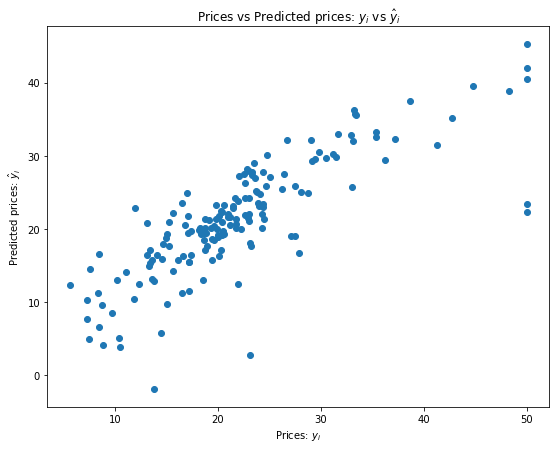

In [24]:
plt.figure(figsize=(9,7))

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

### วัดประสิทธิภาพของโมเดลการทำนาย

In [25]:
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.48
Mean Squared Error: 27.97
Root Mean Squared Error: 5.29
